# IMEC2201 Herramientas Computacionales 
## Semana 2: Gráficas y Visualizaciones
### Clase 3: DataFrames.jl y Plots.jl

Universidad de los Andes — Abril 4, 2022.

---

## TABLA DE CONTENIDO

### Sección 1: DataFrames.jl [→](#section1)
- 1.1. Cargar Librerías
- 1.2. Cargar Datos desde Excel
    - 1.2.1. Valores 'Missing'
    - 1.2.2. Filtrar Datos    
- 1.3. Extraer Año, Mes, Día
- 1.4. Reordenar Columnas
- 1.5. Datos Únicos con unique()
- 1.6. Query
- 1.7. Concatenar DataFrames
    - 1.7.1. DataFrame de Voltaje DC
    - 1.7.2. DataFrame de Corriente DC
    - 1.7.3. DataFrame con Irradiancia, Voltaje DC y Corriente DC
- 1.8. Descargar Archivo

### Sección 2: Plots.jl [→](#section2)
- 2.1. Bases
- 2.2. Gráficas con Datos de DataFrame
___

**¡Importante!** Note que la carpeta **week2** contiene dos archivos: `Project.toml` y `Manifest.toml`. Estos configuran el <font color="#FF5733">*ambiente de trabajo*</font> y facilitan el manejo de <font color="#FF5733">librerías</font>.

Para inicializar el ambiente desde Julia REPL, dentro de la carpeta **week2**, ejecute lo siguiente:

```shell
$ (v1.7) pkg > activate .
$ (week2) pkg> instantiate
```

**Nota:** Para acceder al Pkg REPL, escriba el corchete derecho `]` en el Julia REPL. Note que el REPL cambie de color de verde (Julia REPL) a azul (Pkg REPL). Una vez ejecutado el código `activate .`, el prefijo entre paréntesis indica el ambiente activo: cambia de `v1.7` a `week2`.

O, desde Jupyter Notebook, ejecute:

```julia
$ using Pkg
$ Pkg.activate()
$ Pkg.instantiate()
```

**Nota:** La activación del ambiente <font color="#FF5733">*precompila*</font> las librerías por lo que puede tardar un momento su ejecución completa.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información en la documentación oficial de la librería [`Pkg.jl`](https://pkgdocs.julialang.org/v1/environments/) y en el documento dando clic [aquí](https://towardsdatascience.com/how-to-setup-project-environments-in-julia-ec8ae73afe9c).
</div>

In [ ]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()

  Activating project at `~/Documents/GitHub/ua-imec2001-hc-202210/content/week2`


In [2]:
Pkg.status()

      Status `~/Documents/GitHub/ua-imec2001-hc-202210/content/week2/Project.toml`
  [336ed68f] CSV v0.10.4
  [a93c6f00] DataFrames v1.3.2
  [91a5bcdd] Plots v1.27.4
  [fdbf4ff8] XLSX v0.7.9
  [37e2e46d] LinearAlgebra
  [10745b16] Statistics


<a id="section1"></a>
# Sección 1: DataFrames.jl

## 1.1. Cargar Librerías

In [1]:
using Pkg
Pkg.add("XLSX")
Pkg.add("CSV")
Pkg.add("DataFrames")

    Updating registry at `C:\Users\danie\.julia\registries\General.toml`
   Resolving package versions...
   Installed Qt5Base_jll ─ v5.15.3+1
  No Changes to `C:\Users\danie\OneDrive\Documentos\GitHub\ua-imec2001-hc-202210\Herrmainetas C\content\week2\Project.toml`
    Updating `C:\Users\danie\OneDrive\Documentos\GitHub\ua-imec2001-hc-202210\Herrmainetas C\content\week2\Manifest.toml`
  [ea2cea3b] ↑ Qt5Base_jll v5.15.3+0 ⇒ v5.15.3+1
Precompiling project...
  ✓ Qt5Base_jll
  ✓ GR_jll
  ✓ GR
  ✓ Plots
  4 dependencies successfully precompiled in 121 seconds (162 already precompiled)
   Resolving package versions...
  No Changes to `C:\Users\danie\OneDrive\Documentos\GitHub\ua-imec2001-hc-202210\Herrmainetas C\content\week2\Project.toml`
  No Changes to `C:\Users\danie\OneDrive\Documentos\GitHub\ua-imec2001-hc-202210\Herrmainetas C\content\week2\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\danie\OneDrive\Documentos\GitHub\ua-imec2001-hc-202210\Herrmainetas C\

In [ ]:
Pkg.status()

## 1.2. Cargar Datos desde Excel

In [2]:
using DataFrames, XLSX

df = DataFrame(XLSX.readtable("./data/SD_5Min(1).xlsx", "Radiacion", header=true)...) # ./ es pwd()

rad = copy(df)

println("El DataFrame tiene $(size(rad)[1]) filas y $(size(rad)[2]) columnas.")

first(rad, 5)

El DataFrame tiene 201435 filas y 3 columnas.


,Date,Lufft Irrad (W/m2),Meteocontrol Irrad (W/m2)
,Any,Any,Any
1,2019-08-01,0,1.112
2,2019-08-01T00:05:00,0,1.114
3,2019-08-01T00:10:00,0,1.116
4,2019-08-01T00:15:00,0,1.12
5,2019-08-01T00:20:00,0,1.118


In [6]:
describe(rad)

,variable,mean,min,median,max
,Symbol,Union…,Any,Any,Any
1,Date,,2019-08-01,2020-07-15T17:05:00,2021-06-30T10:25:00
2,Lufft Irrad (W/m2),162.438,0.0,2.201,1554.45
3,Meteocontrol Irrad (W/m2),143.982,0.0,2.952,1444.49


### 1.2.1. Valores 'Missing'

In [7]:
encabezados = names(rad)

for i in encabezados
    println(i)
end

Date
Lufft Irrad (W/m2)
Meteocontrol Irrad (W/m2)


In [8]:
#=
Iteramos sobre las columnas del DataFrame 'rad'
para verificar la cantidad de datos faltantes
=#

for i in encabezados
    println("$i - $(sum(ismissing.(rad[:,i])))")
end

Date - 0
Lufft Irrad (W/m2) - 265
Meteocontrol Irrad (W/m2) - 266


El siguiente código permite filtrar los datos faltantes y asignarles un valor de cero.

```julia
rad[:,"Meteocontrol Irrad (W/m2)"] = replace(rad[:,"Meteocontrol Irrad (W/m2)"], missing => 0)
```

Realizar de manera manual este prodecimiento para todas las columnas es tedioso y propenso a errores. ¿Cómo podríamos hacerlo con un *for loop*?

In [9]:
# For Loop
for i in encabezados
    rad[:,i] = replace(rad[:,i], missing => 0)
end

# Verificación
for i in encabezados
    println("$i - $(sum(ismissing.(rad[:,i])))")
end

Date - 0
Lufft Irrad (W/m2) - 0
Meteocontrol Irrad (W/m2) - 0


### 1.2.2. Filtrar Datos


Note que la columna **Meteocontrol Irrad** reporta valores mínimos hasta 1. Esto se desea filtrar para reducir el valor mínimo de 1 a 0 si la irradiancia es menor o igual a 1.5 W/m2.

In [10]:
# Sin Filtro
first(rad, 5)

,Date,Lufft Irrad (W/m2),Meteocontrol Irrad (W/m2)
,Any,Any,Any
1,2019-08-01,0,1.112
2,2019-08-01T00:05:00,0,1.114
3,2019-08-01T00:10:00,0,1.116
4,2019-08-01T00:15:00,0,1.12
5,2019-08-01T00:20:00,0,1.118


In [11]:
#= Con Filtro

Tomado de: https://discourse.julialang.org/t/how-to-replace-set-change-value-in-array-dataframe-if-value-is-less-greater-than/51039/2
=#

rad[:,"Meteocontrol Irrad (W/m2)"] .= ifelse.(rad[:,"Meteocontrol Irrad (W/m2)"] .<= 1.5, 0.0, rad[:,"Meteocontrol Irrad (W/m2)"])

first(rad, 5)

,Date,Lufft Irrad (W/m2),Meteocontrol Irrad (W/m2)
,Any,Any,Any
1,2019-08-01,0,0.0
2,2019-08-01T00:05:00,0,0.0
3,2019-08-01T00:10:00,0,0.0
4,2019-08-01T00:15:00,0,0.0
5,2019-08-01T00:20:00,0,0.0


## 1.3. Extraer Año, Mes, Día

El tipo de las columnas, visto desde el DataFrame de la celda, es `Any`.

In [12]:
first(rad, 5)

,Date,Lufft Irrad (W/m2),Meteocontrol Irrad (W/m2)
,Any,Any,Any
1,2019-08-01,0,0.0
2,2019-08-01T00:05:00,0,0.0
3,2019-08-01T00:10:00,0,0.0
4,2019-08-01T00:15:00,0,0.0
5,2019-08-01T00:20:00,0,0.0


In [13]:
#=
También lo podemos saber al extraer la información
por cada columna, según StackOverflow
https://stackoverflow.com/questions/57863153/julia-how-to-obtain-the-types-of-every-column-of-a-dataframe-table
=#

eltype.(eachcol(rad))

3-element Vector{DataType}:
 Any
 Any
 Any

¿Cuál es el tipo (`typeof()`) de los datos de la columna **Date**?

In [14]:
for i in 1:5
    println("$(rad[i, "Date"]) - Tipo: $(typeof(rad[i, "Date"]))")
end

2019-08-01 - Tipo: Dates.Date
2019-08-01T00:05:00 - Tipo: Dates.DateTime
2019-08-01T00:10:00 - Tipo: Dates.DateTime
2019-08-01T00:15:00 - Tipo: Dates.DateTime
2019-08-01T00:20:00 - Tipo: Dates.DateTime


`Dates.DateTime` es un tipo de dato especial para trabajar con fechas. Así, es más sencillo extraer, por ejemplo, el año, mes o día de una fecha específica. Más información [aquí](https://docs.julialang.org/en/v1/stdlib/Dates/).

In [15]:
using Dates

println("Año: $(Dates.year(rad[1, "Date"]))")
println("Mes: $(Dates.month(rad[1, "Date"]))")
println("Día: $(Dates.day(rad[1, "Date"]))")

Año: 2019
Mes: 8
Día: 1


¿Y si queremos conocer la hora, minuto y segundos? ¿Por qué nos salta error para el primer dato?

In [16]:
dato = 1
println("$(rad[dato, "Date"]) - Tipo: $(typeof(rad[dato, "Date"]))")
println("Hora: $(Dates.hour(rad[dato, "Date"]))")
println("Minuto: $(Dates.minute(rad[dato, "Date"]))")
println("Segundo: $(Dates.second(rad[dato, "Date"]))")

2019-08-01 - Tipo: Date


LoadError: MethodError: no method matching hour(::Date)
[0mClosest candidates are:
[0m  hour([91m::DateTime[39m) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/Dates/src/accessors.jl:60
[0m  hour([91m::Time[39m) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/Dates/src/accessors.jl:64

In [17]:
dato = 2
println("$(rad[dato, "Date"]) - Tipo: $(typeof(rad[dato, "Date"]))")
println("Hora: $(Dates.hour(rad[dato, "Date"]))")
println("Minuto: $(Dates.minute(rad[dato, "Date"]))")
println("Segundo: $(Dates.second(rad[dato, "Date"]))")

2019-08-01T00:05:00 - Tipo: DateTime
Hora: 0
Minuto: 5
Segundo: 0


Con estas funciones, iteremos el DataFrame `rad` para agregar las columnas de Año, Mes y Día.

In [18]:
first(rad, 5)

,Date,Lufft Irrad (W/m2),Meteocontrol Irrad (W/m2)
,Any,Any,Any
1,2019-08-01,0,0.0
2,2019-08-01T00:05:00,0,0.0
3,2019-08-01T00:10:00,0,0.0
4,2019-08-01T00:15:00,0,0.0
5,2019-08-01T00:20:00,0,0.0


In [19]:
_año = []

for i in rad[:,"Date"]
    push!(_año, Dates.year(i))
end

rad[:, "Year"] = _año # Creamos la columna "Year" y asignamos los valores "_año"

first(rad, 5)

,Date,Lufft Irrad (W/m2),Meteocontrol Irrad (W/m2),Year
,Any,Any,Any,Any
1,2019-08-01,0,0.0,2019
2,2019-08-01T00:05:00,0,0.0,2019
3,2019-08-01T00:10:00,0,0.0,2019
4,2019-08-01T00:15:00,0,0.0,2019
5,2019-08-01T00:20:00,0,0.0,2019


¿Cómo agregaría las columnas de Mes y Día?

In [20]:
_mes = []
_dia = []

for i in rad[:,"Date"]
    push!(_mes, Dates.month(i))
    push!(_dia, Dates.day(i))
end

rad[:, "Month"] = _mes # Creamos la columna "Month" y asignamos los valores "_mes"
rad[:, "Day"] = _dia # Creamos la columna "Day" y asignamos los valores "_dia"

first(rad[:, ["Date", "Year", "Month", "Day"]], 5)

,Date,Year,Month,Day
,Any,Any,Any,Any
1,2019-08-01,2019,8,1
2,2019-08-01T00:05:00,2019,8,1
3,2019-08-01T00:10:00,2019,8,1
4,2019-08-01T00:15:00,2019,8,1
5,2019-08-01T00:20:00,2019,8,1


## 1.4. Reordenar Columnas

In [21]:
names(rad)

6-element Vector{String}:
 "Date"
 "Lufft Irrad (W/m2)"
 "Meteocontrol Irrad (W/m2)"
 "Year"
 "Month"
 "Day"

In [22]:
rad = rad[:,["Date", "Year", "Month", "Day", "Lufft Irrad (W/m2)", "Meteocontrol Irrad (W/m2)"]]

first(rad, 5)

,Date,Year,Month,Day,Lufft Irrad (W/m2),Meteocontrol Irrad (W/m2)
,Any,Any,Any,Any,Any,Any
1,2019-08-01,2019,8,1,0,0.0
2,2019-08-01T00:05:00,2019,8,1,0,0.0
3,2019-08-01T00:10:00,2019,8,1,0,0.0
4,2019-08-01T00:15:00,2019,8,1,0,0.0
5,2019-08-01T00:20:00,2019,8,1,0,0.0


## 1.5. Datos Únicos con `unique()`

In [23]:
unique(rad[:,"Year"])

3-element Vector{Any}:
 2019
 2020
 2021

In [24]:
unique(sort(rad[:,"Month"]))

12-element Vector{Any}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12

In [25]:
unique(rad[:,"Day"])

31-element Vector{Any}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
  ⋮
 20
 21
 22
 23
 24
 25
 26
 27
 28
 29
 30
 31

## 1.6. Query

In [26]:
#=
Solo queremos ver datos para Junio-2021
=#

rad[ (rad[:, "Year"] .== 2021) .& (rad[:, "Month"] .== 6), :]

,Date,Year,Month,Day,Lufft Irrad (W/m2),Meteocontrol Irrad (W/m2)
,Any,Any,Any,Any,Any,Any
1,2021-06-01,2021,6,1,0,0.0
2,2021-06-01T00:05:00,2021,6,1,0,0.0
3,2021-06-01T00:10:00,2021,6,1,0,0.0
4,2021-06-01T00:15:00,2021,6,1,0,0.0
5,2021-06-01T00:20:00,2021,6,1,0,0.0
6,2021-06-01T00:25:00,2021,6,1,0,0.0
7,2021-06-01T00:30:00,2021,6,1,0,0.0
8,2021-06-01T00:35:00,2021,6,1,0,0.0
9,2021-06-01T00:40:00,2021,6,1,0,0.0


In [27]:
#=
Solo queremos ver datos cuando Meteocontrol Irrad >= 400
=#

first(rad[(rad[:, "Meteocontrol Irrad (W/m2)"] .>= 400), :], 10)

,Date,Year,Month,Day,Lufft Irrad (W/m2),Meteocontrol Irrad (W/m2)
,Any,Any,Any,Any,Any,Any
1,2019-08-01T07:40:00,2019,8,1,448.694,432.744
2,2019-08-01T08:00:00,2019,8,1,567.398,554.554
3,2019-08-01T08:05:00,2019,8,1,642.882,629.23
4,2019-08-01T08:10:00,2019,8,1,616.376,600.972
5,2019-08-01T08:15:00,2019,8,1,465.782,458.446
6,2019-08-01T08:25:00,2019,8,1,488.906,459.436
7,2019-08-01T09:05:00,2019,8,1,474.954,451.028
8,2019-08-01T09:30:00,2019,8,1,948.188,912.742
9,2019-08-01T09:35:00,2019,8,1,911.21,887.97


In [28]:
#=
Solo queremos ver datos cuando (Lufft Irrad - Meteocontrol Irrad) <= 100
=#

first(rad[ ((rad[:, "Lufft Irrad (W/m2)"] - rad[:, "Meteocontrol Irrad (W/m2)"]) .<= 100), :], 10)

,Date,Year,Month,Day,Lufft Irrad (W/m2),Meteocontrol Irrad (W/m2)
,Any,Any,Any,Any,Any,Any
1,2019-08-01,2019,8,1,0,0.0
2,2019-08-01T00:05:00,2019,8,1,0,0.0
3,2019-08-01T00:10:00,2019,8,1,0,0.0
4,2019-08-01T00:15:00,2019,8,1,0,0.0
5,2019-08-01T00:20:00,2019,8,1,0,0.0
6,2019-08-01T00:25:00,2019,8,1,0,0.0
7,2019-08-01T00:30:00,2019,8,1,0,0.0
8,2019-08-01T00:35:00,2019,8,1,0,0.0
9,2019-08-01T00:40:00,2019,8,1,0,0.0


In [29]:
#=
Solo queremos ver datos cuando:
    1. Año = 2020
    2. Mes = Agosto y Septiembre
    3. Día = 10 o 15
    4. Meteocontrol Irrad >= 800
=#
query = 
    rad[
        (rad[:, "Year"] .== 2020) .&
        (            (rad[:, "Month"] .== 8) .| (rad[:, "Month"] .== 9)          ) .& 
        (  (rad[:, "Day"] .== 10)   .|   (rad[:, "Day"] .== 15)  ) .&
        (rad[:, "Meteocontrol Irrad (W/m2)"] .>= 400)
    , :]
first(query, 5)

,Date,Year,Month,Day,Lufft Irrad (W/m2),Meteocontrol Irrad (W/m2)
,Any,Any,Any,Any,Any,Any
1,2020-08-10T09:20:00,2020,8,10,437.832,412.41
2,2020-08-10T09:45:00,2020,8,10,414.51,403.93
3,2020-08-10T10:50:00,2020,8,10,452.072,422.56
4,2020-08-10T10:55:00,2020,8,10,505.444,466.006
5,2020-08-10T11:00:00,2020,8,10,637.394,596.994


In [30]:
# Verifiquemos
println(unique(query[:, "Year"]))
println(unique(query[:, "Month"]))
println(unique(query[:, "Day"]))
println(minimum(query[:, "Meteocontrol Irrad (W/m2)"]))

Any[2020]
Any[8, 9]
Any[10, 15]
402.982


Para el caso de datos tabulares en formato CSV, usamos la correspondiente librería (i.e., `CSV`).

In [31]:
using CSV

file = CSV.File("./data/hc-users.csv", header=1, delim=';')
df2 = DataFrame(file)

first(df2, 5)

LoadError: ArgumentError: "./data/hc-users.csv" is not a valid file or doesn't exist

### 1.7. Concatenar DataFrames

### 1.7.1. DataFrame de Voltaje DC

In [32]:
df = DataFrame(XLSX.readtable("./data/SD_5Min.xlsx", "Tension_DC", header=true)...)

Vdc = copy(df)

println("El DataFrame tiene $(size(Vdc)[1]) filas y $(size(Vdc)[2]) columnas.\n")

# For Loop
for i in names(Vdc)
    Vdc[:,i] = replace(Vdc[:,i], missing => 0)
end

# Verificación
for i in names(Vdc)
    println("$i - $(sum(ismissing.(Vdc[:,i])))")
end


first(Vdc, 5)

El DataFrame tiene 201435 filas y 5 columnas.

Date - 0
DC Voltage SysB (V) - 0
DC Voltage SysA (V) - 0
DC Voltage SysB String 1 (V) - 0
DC Voltage SysB String 2 (V) - 0


,Date,DC Voltage SysB (V),DC Voltage SysA (V),DC Voltage SysB String 1 (V)
,Any,Any,Any,Any
1,2019-08-01,0,0,0
2,2019-08-01T00:05:00,0,0,0
3,2019-08-01T00:10:00,0,0,0
4,2019-08-01T00:15:00,0,0,0
5,2019-08-01T00:20:00,0,0,0


### 1.7.2. DataFrame de Corriente DC

Cree un DataFrame a partir de importar los datos de corriente DC (hoja `Corriente_DC` en el archivo Excel) y reemplace los datos con tipo `missing` a cero.

In [33]:
df2 = DataFrame(XLSX.readtable("./data/SD_5Min.xlsx", "Corriente_DC", header=true)...)

Idc = copy(df2)

println("El DataFrame tiene $(size(Idc)[1]) filas y $(size(Idc)[2]) columnas.\n")

# For Loop
for i in names(Idc)
    Idc[:,i] = replace(Idc[:,i], missing => 0)
end

# Verificación
for i in names(Idc)
    println("$i - $(sum(ismissing.(Idc[:,i])))")
end

first(Idc, 5)

El DataFrame tiene 201435 filas y 5 columnas.

Date - 0
DC Current SysB (A) - 0
DC Current SysA (A) - 0
DC Current SysB String 1 (A) - 0
DC Current SysB String 2 (A) - 0


,Date,DC Current SysB (A),DC Current SysA (A),DC Current SysB String 1 (A)
,Any,Any,Any,Any
1,2019-08-01,0,0,0
2,2019-08-01T00:05:00,0,0,0
3,2019-08-01T00:10:00,0,0,0
4,2019-08-01T00:15:00,0,0,0
5,2019-08-01T00:20:00,0,0,0


### 1.7.3. DataFrame con Irradiancia, Voltaje DC y Corriente DC

In [34]:
#=
Primero chequeamos que todos los DataFrame
tengan la misma cantidad de filas con 'nrow()'
=#
println("Filas DataFrame Radiación: $(nrow(rad))")
println("Filas DataFrame Voltaje: $(nrow(Vdc))")
println("Filas DataFrame Corriente: $(nrow(Idc))")

Filas DataFrame Radiación: 201435
Filas DataFrame Voltaje: 201435
Filas DataFrame Corriente: 201435


Para realizar la concatenación, tenemos varias opciones:

- `innerjoin`: la salida contiene filas para los valores de la clave que existen en los argumentos primero (izquierda) y segundo (derecha) para unir.

- `leftjoin`: la salida contiene filas para los valores de la clave que existen en el primer argumento (izquierda) para unir, ya sea que ese valor exista o no en el segundo argumento (derecha).

- `rightjoin`: la salida contiene filas para los valores de la clave que existen en el segundo argumento (derecha) para unir, ya sea que ese valor exista o no en el primer argumento (izquierda).

- `outerjoin`: la salida contiene filas para los valores de la clave que existen en el primer argumento (izquierda) o segundo (derecha) para unir.

Más info [aquí](https://dataframes.juliadata.org/stable/man/joins/).

In [35]:
first(rad, 5)

,Date,Year,Month,Day,Lufft Irrad (W/m2),Meteocontrol Irrad (W/m2)
,Any,Any,Any,Any,Any,Any
1,2019-08-01,2019,8,1,0,0.0
2,2019-08-01T00:05:00,2019,8,1,0,0.0
3,2019-08-01T00:10:00,2019,8,1,0,0.0
4,2019-08-01T00:15:00,2019,8,1,0,0.0
5,2019-08-01T00:20:00,2019,8,1,0,0.0


In [36]:
first(Vdc, 5)

,Date,DC Voltage SysB (V),DC Voltage SysA (V),DC Voltage SysB String 1 (V)
,Any,Any,Any,Any
1,2019-08-01,0,0,0
2,2019-08-01T00:05:00,0,0,0
3,2019-08-01T00:10:00,0,0,0
4,2019-08-01T00:15:00,0,0,0
5,2019-08-01T00:20:00,0,0,0


In [37]:
df = innerjoin(rad, Vdc, on="Date")

describe(df)

,variable,mean,min,median,max
,Symbol,Union…,Any,Any,Any
1,Date,,2019-08-01,2020-07-15T17:00:00,2021-06-30T10:25:00
2,Year,2020.04,2019,2020.0,2021
3,Month,6.49904,1,6.0,12
4,Day,15.7154,1,16.0,31
5,Lufft Irrad (W/m2),162.224,0.0,2.102,1554.45
6,Meteocontrol Irrad (W/m2),143.303,0.0,2.82,1444.49
7,DC Voltage SysB (V),354.588,0.0,411.899,875.485
8,DC Voltage SysA (V),265.251,0.0,0.0,773.59
9,DC Voltage SysB String 1 (V),347.845,0.0,294.068,877.152


Concatene los datos del DataFrame `Idc` al DataFrame `df`.

<font color="white">
df = innerjoin(df, Idc, on = "Date")
describe(df)
</font>

In [38]:
df = innerjoin(df, Idc, on="Date")
describe(df)

,variable,mean,min,median,max
,Symbol,Union…,Any,Any,Any
1,Date,,2019-08-01,2020-07-15T16:45:00,2021-06-30T10:25:00
2,Year,2020.04,2019,2020.0,2021
3,Month,6.49911,1,6.0,12
4,Day,15.7152,1,16.0,31
5,Lufft Irrad (W/m2),162.219,0.0,2.102,1554.45
6,Meteocontrol Irrad (W/m2),143.298,0.0,2.818,1444.49
7,DC Voltage SysB (V),354.577,0.0,411.736,875.485
8,DC Voltage SysA (V),265.243,0.0,0.0,773.59
9,DC Voltage SysB String 1 (V),347.835,0.0,294.058,877.152


## 1.8. Descargar Archivo

In [39]:
using CSV
CSV.write("./produccion_solar.csv", df3, delim=';', decimal=',', header=true) # ./ es pwd()

LoadError: UndefVarError: df3 not defined

<a id="section2"></a>
# Sección 2: Plots.jl

## 2.1. Bases

Julia dispone de diversas librerías para generar visualizaciones ([aquí](https://juliapackages.com/c/graphics)). En este caso, usaremos `Plots.jl`.

In [40]:
rand(4,4)

4×4 Matrix{Float64}:
 0.0933416  0.195057  0.736525   0.663588
 0.751668   0.288689  0.176857   0.593465
 0.166208   0.478992  0.0819028  0.265638
 0.820708   0.735057  0.782051   0.66608

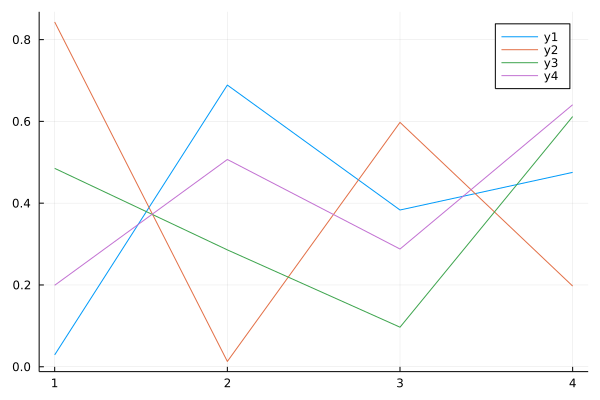

In [41]:
using Plots
plot(rand(4,4))

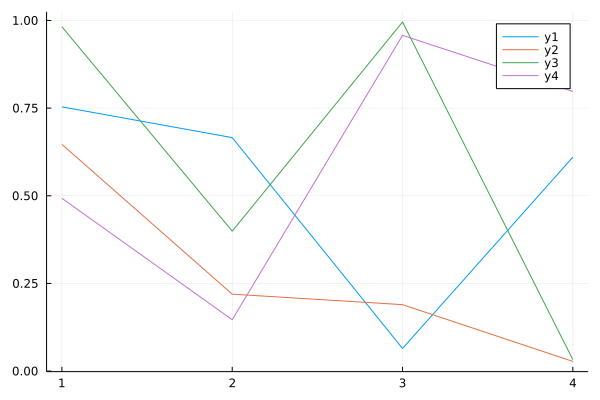

In [42]:
import Plots
const plt = Plots # 'plt' es un alias de 'Plots'; equivalente a "import Plots as pl" en Python
plt.plot(rand(4,4))

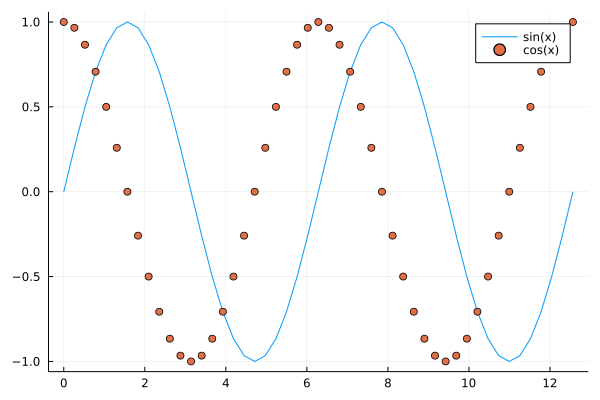

In [43]:
#=
Algunas propiedades de Plots.jl
=#

x = collect(0:π/12:4π)
y1 = [sin(i) for i in x]
y2 = cos.(x)

plot(x, y1, label="sin(x)")
scatter!(x, y2, label="cos(x)")

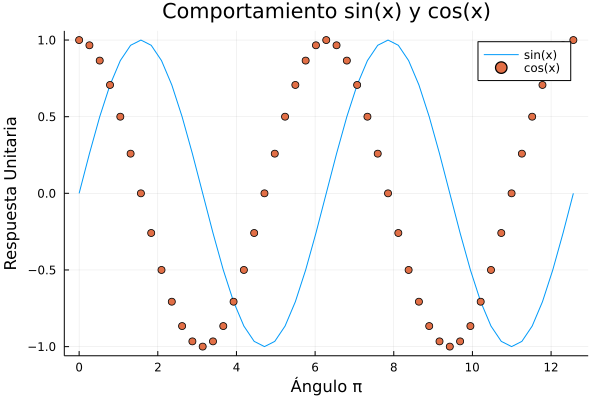

In [44]:
xlabel!("Ángulo π")
ylabel!("Respuesta Unitaria")
title!("Comportamiento sin(x) y cos(x)")

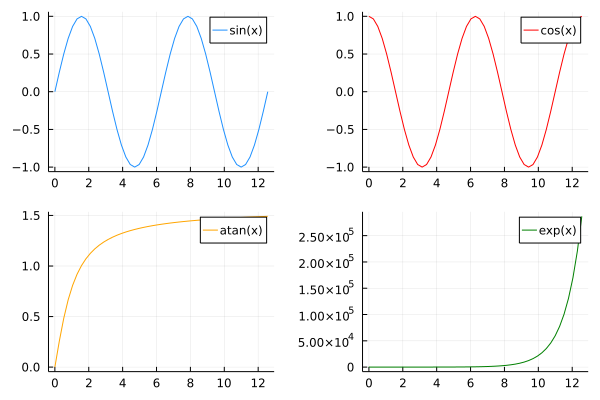

In [45]:
y3 = atan.(x)
y4 = exp.(x)

p1 = plot(x, y1, label="sin(x)", color="dodgerblue")
p2 = plot(x, y2, label="cos(x)", color="red")
p3 = plot(x, y3, label="atan(x)", color="orange")
p4 = plot(x, y4, label="exp(x)", color="green")

plot(p1, p2, p3, p4, layout=(2,2), legend=true)

## 2.2. Gráficas con Datos de  DataFrame

In [46]:
first(df, 5) # Si queremos ver todo el DataFrame: show(df, allrows=true, allcols=true)

,Date,Year,Month,Day,Lufft Irrad (W/m2),Meteocontrol Irrad (W/m2)
,Any,Any,Any,Any,Any,Any
1,2019-08-01,2019,8,1,0,0.0
2,2019-08-01T00:05:00,2019,8,1,0,0.0
3,2019-08-01T00:10:00,2019,8,1,0,0.0
4,2019-08-01T00:15:00,2019,8,1,0,0.0
5,2019-08-01T00:20:00,2019,8,1,0,0.0


In [47]:
names(df)

14-element Vector{String}:
 "Date"
 "Year"
 "Month"
 "Day"
 "Lufft Irrad (W/m2)"
 "Meteocontrol Irrad (W/m2)"
 "DC Voltage SysB (V)"
 "DC Voltage SysA (V)"
 "DC Voltage SysB String 1 (V)"
 "DC Voltage SysB String 2 (V)"
 "DC Current SysB (A)"
 "DC Current SysA (A)"
 "DC Current SysB String 1 (A)"
 "DC Current SysB String 2 (A)"

In [48]:
query = 
    
    rad[
        (rad[:, "Date"] .>= DateTime("2020-01-01", dateformat"yyyy-mm-dd hh:mm:ss")) .&
        (rad[:, "Date"] .<= DateTime("2020-01-07", dateformat"yyyy-mm-dd hh:mm:ss"))
    , :]


println(first(query))
println()
println(last(query))

DataFrameRow
 Row │ Date        Year  Month  Day  Lufft Irrad (W/m2)  Meteocontrol Irrad (W/m2) 
     │ Any         Any   Any    Any  Any                 Any                       
─────┼─────────────────────────────────────────────────────────────────────────────
   1 │ 2020-01-01  2020  1      1    0                   0.0

DataFrameRow
  Row │ Date        Year  Month  Day  Lufft Irrad (W/m2)  Meteocontrol Irrad (W/m2) 
      │ Any         Any   Any    Any  Any                 Any                       
──────┼─────────────────────────────────────────────────────────────────────────────
 1729 │ 2020-01-07  2020  1      7    0                   0.0


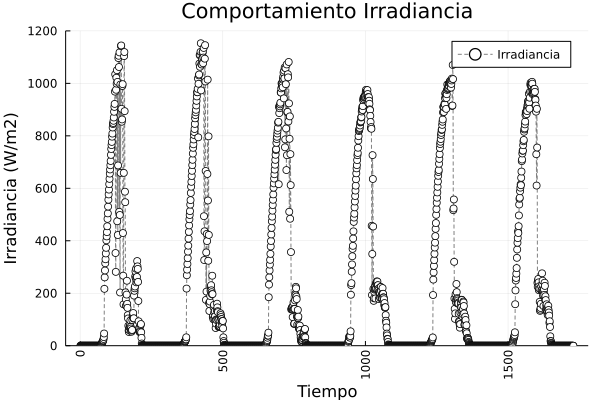

In [49]:
ejex = query[:,"Day"] # Debemos transformar: Dates.format(query[2,"Date"], "yyyy-mm-dd HH:MM:SS")
ejey = query[:,"Meteocontrol Irrad (W/m2)"]

fig = plot(ejey,
     seriestype = :line, 
     title="Comportamiento Irradiancia", 
     xlabel="Tiempo", 
     ylabel="Irradiancia (W/m2)",
     xrotation=90,
     ylims=(0,1200),
     lab="Irradiancia",
     legend=:topright,
     ls=:dash,
     lc=:grey,
     m=:circle,
     ms=4,
     mc=:white)

In [50]:
savefig(fig, "./irradiancia.png")